# **Punto 5**

# Objetivo
 El objetivo de este código es implementar un clasificador de Máquinas de Soporte Vectorial (SVM) utilizando la biblioteca Scikit-Learn en Python. El modelo SVM se ajusta a los datos de entrada y se optimiza mediante una búsqueda en cuadrícula de hiperparámetros. Posteriormente, se evalúa el rendimiento del modelo mediante la construcción de una curva ROC y la visualización de una matriz de confusión.



# Librerías Utilizadas

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC 
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import learning_curve
import numpy as np

# Clasificación binaria de púlsares

![Mi Imagen](pulsar.jpg)
un púlsar es una estrella de neutrones que emite un haz de radiación que barre el espacio como un faro. Los púlsares se forman cuando una estrella masiva colapsa al final de su vida, dejando atrás un remanente diminuto y denso. La estrella de neutrones gira muy rápidamente, y su campo magnético acelera partículas a velocidades cercanas a la de la luz. Estas partículas emiten radiación, que se enfoca en un haz por el fuerte campo magnético de la estrella.

## Datos Pulsar

## Variables Explicativas

- **Mean_Integrated**
Mean of Observations.

- **SD**
Standard deviation of Observations.

- **EK**
Excess kurtosis of Observations.

- **Skewness**
In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. Skewness of Observations.

- **Mean_DMSNR_Curve**
Mean of DM SNR CURVE of Observations.

- **SD_DMSNR_Curve**
Standard deviation of DM SNR CURVE of Observations.

- **EK_DMSNR_Curve**
Excess kurtosis of DM SNR CURVE of Observations.

- **Skewness_DMSNR_Curve**
Skewness of DM SNR CURVE of Observations.

## Variables Respuesta
- **Class:**
  - 0: Not a pulsar
  - 1: Pulsar


In [2]:
datos = pd.read_csv('trainX.csv')
X = datos.iloc[:, 1:-1]
y = datos['Class']

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hiperparámetros
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

Hiperparámetros: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
ROC-AUC del modelo: 0.9944209891607887


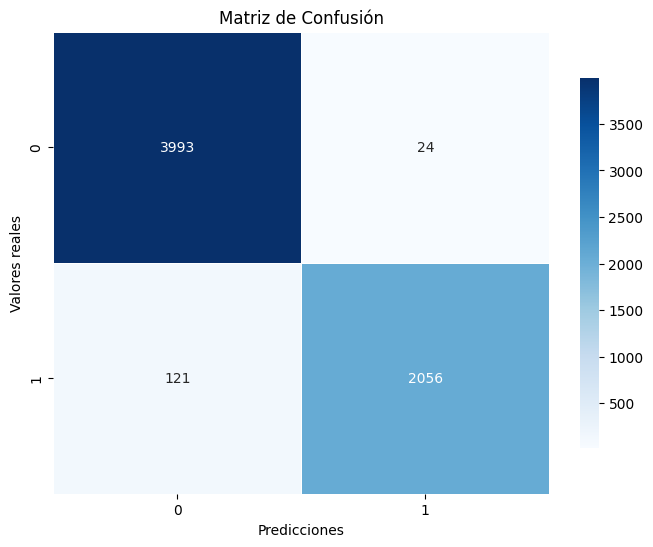

In [4]:
svm_classifier = svm.SVC(probability=True)

# validación cruzada estratificada de 10 folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(svm_classifier, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)

#almacenar ls metrica de cada validacion cruzada
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

results_list = []
for mean, stdev, param in zip(means, stds, params):
    result_dict = {'MeanROCAUC': mean, 'SD': stdev, 'Parameters': param}
    results_list.append(result_dict)
Metrica = pd.DataFrame(results_list)

#hiperparámetros
best_params = grid_search.best_params_
print("Hiperparámetros:", best_params)

# Obtener el modelo con los mejores hiperparámetros
best_svm = grid_search.best_estimator_
y_pred_proba = best_svm.predict_proba(X_test)[:, 1]  # Obtener las probabilidades de la clase positiva

# Calcular la métrica ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC del modelo:", roc_auc)

#matriz de confusión
y_pred = best_svm.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar_kws={"shrink": 0.8})
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()


In [5]:
Metrica

,MeanROCAUC,SD,Parameters
0,0.994080,0.001543,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}"
1,0.992847,0.001675,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}"
2,0.989598,0.001740,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}"
3,0.994080,0.001543,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}"
4,0.992849,0.001676,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}"
5,0.989594,0.001740,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}"
6,0.994061,0.001543,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}"
7,0.992998,0.001788,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}"
8,0.990837,0.002314,"{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}"
9,0.994061,0.001543,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}"


### Número de SV

In [6]:
num_support_vectors1 = best_svm.n_support_
print("Número de vectores de soporte para cada clase:", num_support_vectors1)

Número de vectores de soporte para cada clase: [875 873]


#### para tener en cuenta en las curvas de aprendizaje
![Mi Imagen](curva.jpg)

### Curvas de aprendizaje

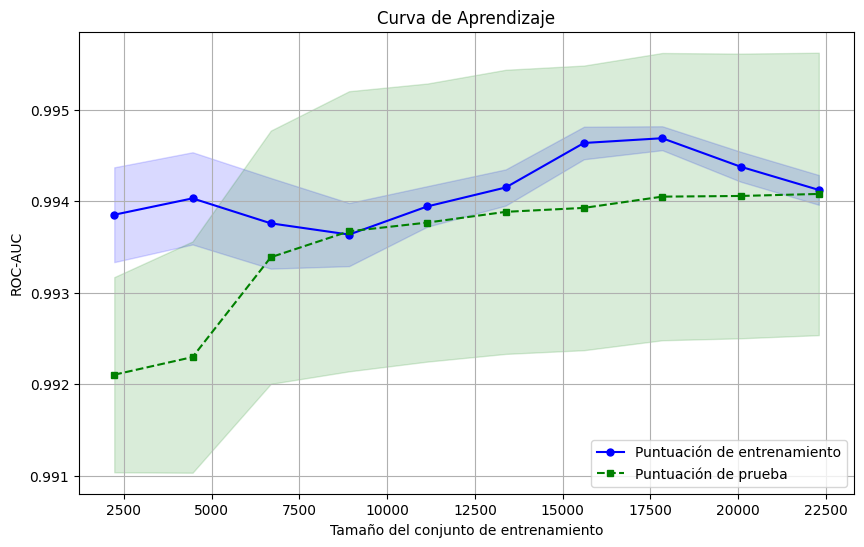

In [7]:
train_sizes, train_scores, test_scores = learning_curve(
    best_svm, X_train, y_train, cv=cv, scoring='roc_auc', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcular las medias y las desviaciones estándar de las puntuaciones de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Puntuación de entrenamiento')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Puntuación de prueba')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Curva de Aprendizaje')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('ROC-AUC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Resultados y Conclusiones
El código proporciona un modelo SVM optimizado con los mejores hiperparámetros encontrados mediante búsqueda en cuadrícula.
- **C** 0.1
- **gamma** 'scale', 
- **kernel** 'linear'
- **Área bajo la curva ROC** 0.9944205317570285
- **Número de Vectores de soporte** Hay 875 vectores de soporte para la primera clase y 873 vectores de soporte para la segunda clase. Esto significa que 461 vectores de soporte en tu modelo SVM entrenado. (5%)
- **Curva de aprendizaje** Note que hay una buena relación entre el sesgo y la varianza durante el entrenaminto logrando un buen ajuste.

# Clasificación de la presencia y ausencia de reptiles en Cerrejón

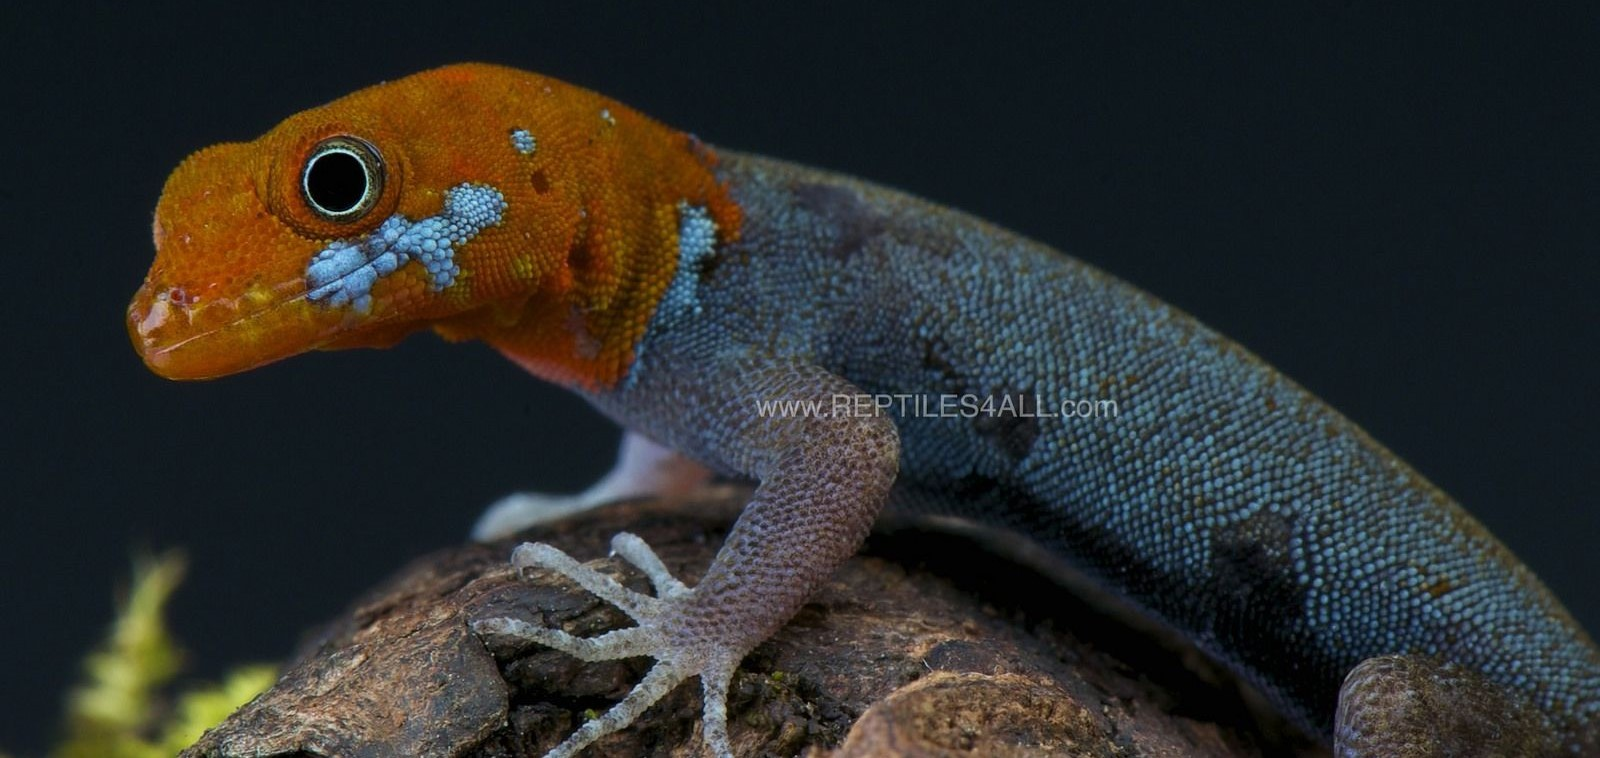
La zona de La Guajira Cerrejón, en Colombia, es un área de gran diversidad biológica, incluyendo una gran variedad de reptiles. Se han registrado más de 60 especies de reptiles en esta zona, incluyendo serpientes, lagartos, tortugas y caimanes.

# Datos Reptiles



## Variables Explicativas

- **t_max** 
Representa la temperatura máxima registrada durante un período específico, como un día.

- **solar radiation**
Hace referencia a la radiación solar medida en el área o ubicación específica. Puede indicar la cantidad de energía solar recibida.

- **speed wind**
Indica la velocidad del viento en la ubicación dada. Puede medirse en unidades como metros por segundo o kilómetros por hora.

- **t_min**
Representa la temperatura mínima registrada durante un período específico, como un día.

- **vapr**
Se refiere a la presión de vapor, que es la presión ejercida por el vapor de agua en el aire. Es un indicador de la cantidad de humedad en el aire.

- **prec**
Indica la cantidad de precipitación, como lluvia o nieve, registrada en el periodo de tiempo considerado.

- **tavg**
Representa la temperatura promedio, que es el promedio entre la temperatura máxima y mínima en un periodo específico.

- **Año**
Indica el año al que corresponde la información del conjunto de datos.

- **Month**
Representa el mes al que corresponde la información del conjunto de datos.

## Variables Respuesta

- **Presencia**
  - 0: Ausencia
  - 1: Presencia


In [9]:
species = pd.read_csv("Gonatodes_vittatus.csv")

In [11]:
# Escalar los datos para que tengan media cero y varianza unitaria
X, y = species.iloc[:, [i for i in range(9, 0, -1)]].values, species.iloc[:, 0].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# SVC

Hiperparametros:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
AUC-ROC: 0.9138293085345732


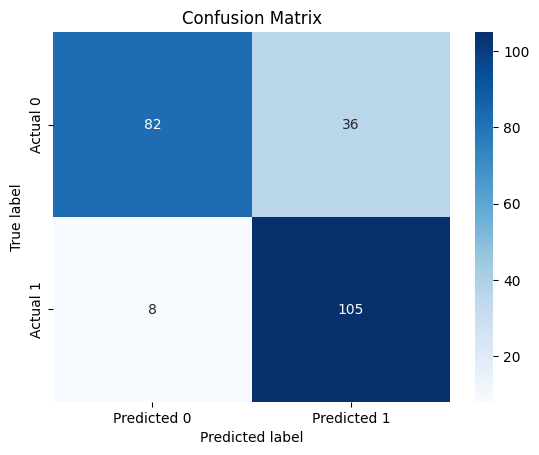

In [12]:
model = SVC(probability=True)

# Datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Hiperparámetros 
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

# validación cruzada estratificada de 10 folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)


#Almacenar las metricas de cada validación
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
results_list = []
for mean, stdev, param in zip(means, stds, params):
    result_dict = {'MeanROCAUC': mean, 'SD': stdev, 'Parameters': param}
    results_list.append(result_dict)
Metrica = pd.DataFrame(results_list)

# Hiperparametros
best_params = grid_search.best_params_
print("Hiperparametros: ",best_params)

# Crea un modelo con los mejores parámetros
best_model = model.set_params(**best_params)

# Entrenamiento del modelo final con los mejores parámetros en el conjunto de entrenamiento
best_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_prob = best_model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

# Calcula la curva ROC
fper, tper, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fper, tper)
print("AUC-ROC:", roc_auc)

#Matriz de confución
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


In [13]:
Metrica

,MeanROCAUC,SD,Parameters
0,0.739476,0.052987,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}"
1,0.766732,0.046945,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}"
2,0.739541,0.041027,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}"
3,0.739476,0.052987,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}"
4,0.767309,0.048829,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}"
5,0.740746,0.045044,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}"
6,0.747610,0.052901,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}"
7,0.859926,0.036235,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}"
8,0.793590,0.035201,"{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}"
9,0.747610,0.052901,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}"


### Número de SV

In [14]:
num_support_vectors = best_model.n_support_
print("Número de vectores de soporte para cada clase:", num_support_vectors)

Número de vectores de soporte para cada clase: [224 237]


### Curvas de aprendizaje

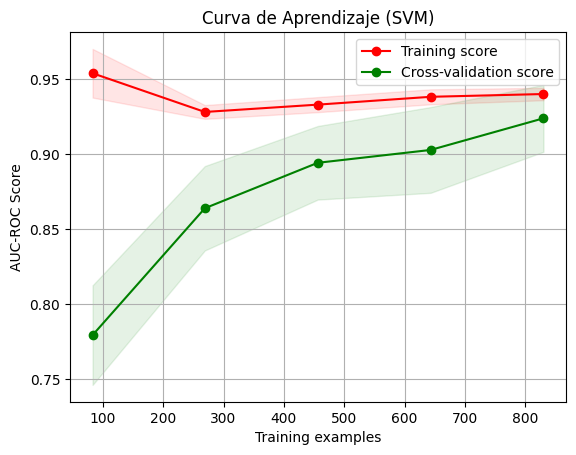

In [15]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC-ROC Score")
    
    # Calcula la curva de aprendizaje
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring='roc_auc', n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Calcula las medias y desviaciones estándar de los puntajes
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Grafica las curvas de aprendizaje
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Visualiza la curva de aprendizaje para tu modelo
title = "Curva de Aprendizaje (SVM)"
plot_learning_curve(best_model, title, X_train, y_train, cv=cv)
plt.show()


## Resultados y Conclusiones
El código proporciona un modelo SVM optimizado con los mejores hiperparámetros encontrados mediante búsqueda en cuadrícula.
- **C** 10
- **gamma** 'scale', 
- **kernel** 'rbf'
- **Área bajo la curva ROC** 0.9138293085345732
- **Número de Vectores de soporte** Hay 224 vectores de soporte para la primera clase y 237 vectores de soporte para la segunda clase. Esto significa que 461 vectores de soporte en tu modelo SVM entrenado. (40%)
- **Curva de aprendizaje** En un inicio se visualiza una varianza muy alta sin embargo, al final logra un buen ajuste.